In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("datasets/data_2024-04-18T06-54-03.csv")

df.tail()


,timestamp,center_image,left_image,right_image,steering,throttle
35948,2024-04-16T07-03-34-827647,images/2024-04-16T07-03-34-827647_rgb_center.jpg,images/2024-04-16T07-03-34-840249_rgb_left.jpg,images/2024-04-16T07-03-34-834033_rgb_right.jpg,0.000440,0.85
35949,2024-04-16T07-03-34-876268,images/2024-04-16T07-03-34-860119_rgb_center.jpg,images/2024-04-16T07-03-34-873454_rgb_left.jpg,images/2024-04-16T07-03-34-866792_rgb_right.jpg,0.000440,0.85
35950,2024-04-16T07-03-34-928311,images/2024-04-16T07-03-34-922039_rgb_center.jpg,images/2024-04-16T07-03-34-935114_rgb_left.jpg,images/2024-04-16T07-03-34-928311_rgb_right.jpg,-0.000176,0.85
35951,2024-04-16T07-03-34-969995,images/2024-04-16T07-03-34-984939_rgb_center.jpg,images/2024-04-16T07-03-34-967365_rgb_left.jpg,images/2024-04-16T07-03-34-991895_rgb_right.jpg,0.000616,0.85
35952,2024-04-16T07-03-35-032402,images/2024-04-16T07-03-35-016742_rgb_center.jpg,images/2024-04-16T07-03-35-029655_rgb_left.jpg,images/2024-04-16T07-03-35-022877_rgb_right.jpg,0.000000,0.85


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
steering,35953.0,0.00855,0.104536,-0.652727,-0.00044,0.000000,0.000440,0.80
throttle,35953.0,0.22177,0.269419,0.000000,0.00000,0.128395,0.384793,0.85


<Axes: xlabel='steering', ylabel='Count'>

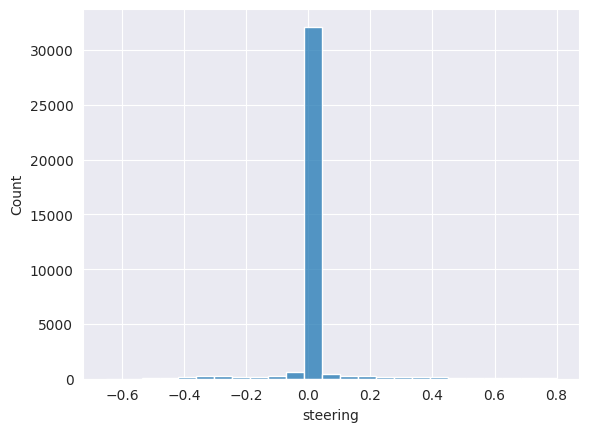

In [19]:
# draw a boxplot for the steering column
sns.histplot(df, x="steering", bins=25)

In [20]:
df["steering"].skew()

3.029198981290947

In [15]:
# Delimitation outliers based on 3 standard deviations

std = df["steering"].std()
mean = df["steering"].mean()

upper_limit = mean + 3*std
lower_limit = mean - 3*std

outliers = df[(df["steering"] > upper_limit) | (df["steering"] < lower_limit)]
outliers["steering"].count()

1426

In [21]:
df_m = df[df["throttle"] != 0]
df_m["steering"].count()

18808

In [9]:
df_m = df

In [22]:
closed_to_zero = df_m[(df_m["steering"] >= -0.05) & (df_m["steering"] <= 0.05)]["steering"]
closed_to_zero.count()

15592

In [23]:
# reduce the number of examples close to zero from 29047 to 1500
df2 = df_m.drop(closed_to_zero.sample(frac=0.9).index)


In [24]:
df2["steering"].count()

4775

In [25]:
df2["steering"].skew()

0.619121615861218

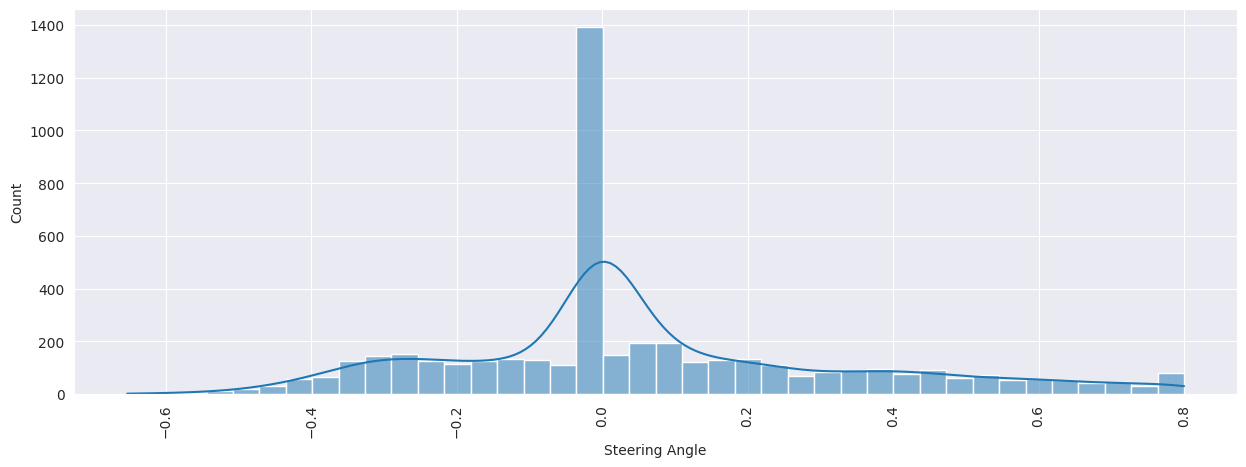

In [26]:
plt.figure(figsize=(15, 5))

# Put a vertical label to every of the 40 bins in vertical

sns.histplot(df2, x="steering", bins=40, kde=True)
plt.xlabel("Steering Angle")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Save df2, export the cleaned data ad a new csv file
df2.to_csv("datasets/data.csv", index=False, header=True, encoding="utf-8")

In [5]:
closed_to_01 = df[((df["steering"] >= -0.15) & (df["steering"] < -0.05)) | ((df["steering"] > 0.05) & (df["steering"] <= 0.15))]["steering"]
closed_to_01.count()

3343

In [6]:
closed_to_02 = df[((df["steering"] >= -0.25) & (df["steering"] < -0.15)) | ((df["steering"] > 0.15) & (df["steering"] <= 0.25))]["steering"]
closed_to_02.count()

3084

In [7]:
closed_to_03 = df[((df["steering"] >= -0.35) & (df["steering"] < -0.25)) | ((df["steering"] > 0.25) & (df["steering"] <= 0.35))]["steering"]
closed_to_03.count()

985

In [13]:
# reduce the number of examples
df3 = df.drop(closed_to_zero.sample(frac=0.9).index)
df3 = df3.drop(closed_to_01.sample(frac=0.90).index)
df3 = df3.drop(closed_to_02.sample(frac=0.95).index)
df3 = df3.drop(closed_to_03.sample(frac=0.95).index)

In [140]:
# round values from -0.05 to 0.05 to 0
df3.loc[(df3["steering"] >= -0.05) & (df3["steering"] <= 0.05), "steering"] = 0

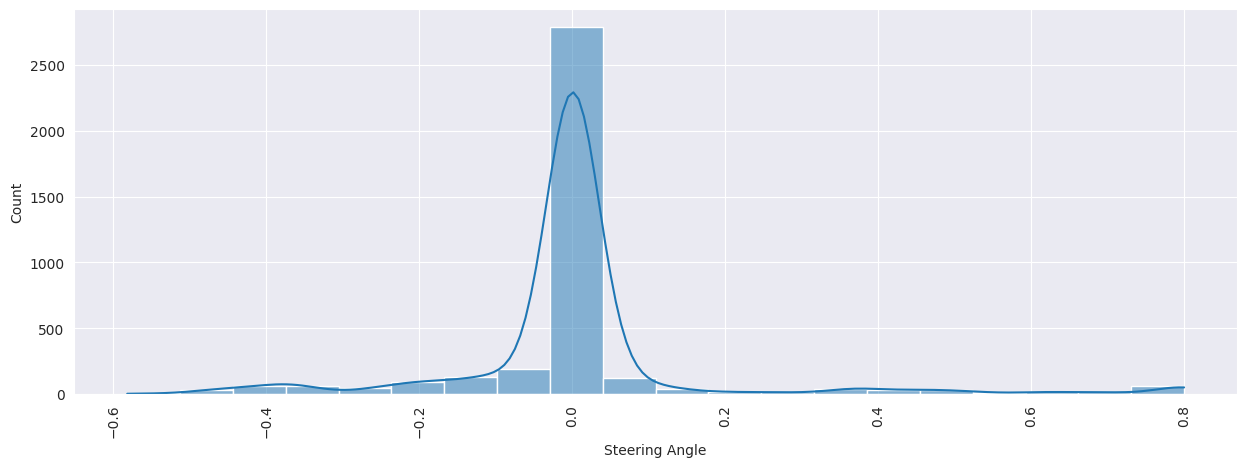

In [14]:
plt.figure(figsize=(15, 5))

# Put a vertical label to every of the 40 bins in vertical

sns.histplot(df3, x="steering", bins=20, kde=True)
plt.xlabel("Steering Angle")
plt.xticks(rotation=90)
plt.show()

In [15]:
df3["steering"].skew()

1.842603595931794

In [16]:
df3["steering"].count()

3798

In [17]:
# Export the cleaned data ad a new csv file
df3.to_csv("datasets/data.csv", index=False, header=True, encoding="utf-8")

In [18]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
steering,3798.0,0.006478,0.173216,-0.581881,-0.003787,0.0,0.003299,0.8
